## Preprocessing of Employee Dataset

### Loading the dataset and displaying the important details

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
df = pd.read_csv("Employee.csv")
df.head(), df.shape

(   Company   Age  Salary     Place Country  Gender
 0      TCS  20.0     NaN   Chennai   India       0
 1  Infosys  30.0     NaN    Mumbai   India       0
 2      TCS  35.0  2300.0  Calcutta   India       0
 3  Infosys  40.0  3000.0     Delhi   India       0
 4      TCS  23.0  4000.0    Mumbai   India       0,
 (148, 6))

#### There are 148 records with 6 features

### Data Exploration

#### Statisticl Analysis

In [144]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


#### Analysing the unique values and their count for each feature

In [145]:
df.Company.unique(), len(df.Company.unique())

(array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
        'Congnizant', 'Infosys Pvt Lmt'], dtype=object),
 7)

In [146]:
df.Age.unique(), len(df.Age.unique())

(array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
        21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
        33., 17.,  0., 54.]),
 30)

In [147]:
df.Salary.unique(), len(df.Salary.unique())

(array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
        1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
        8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
        9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
        3454., 5654., 5009., 5098., 3033.]),
 41)

In [148]:
df.Place.unique(), len(df.Place.unique())

(array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
        nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
       dtype=object),
 12)

In [17]:
df.Country.unique(), len(df.Country.unique())

(array(['India'], dtype=object), 1)

In [18]:
df.Gender.unique(), len(df.Gender.unique())

(array([0, 1], dtype=int64), 2)

### Data Cleaning

#### Handling duplicate rows

In [149]:
df[df.duplicated()]

,Company,Age,Salary,Place,Country,Gender
84,CTS,43.0,NaN,Mumbai,India,0
130,TCS,21.0,4824.0,Mumbai,India,0
131,Infosys,NaN,5835.0,Mumbai,India,0
144,Infosys,22.0,8787.0,Calcutta,India,1


In [150]:
df = df.drop_duplicates()
df.shape

(144, 6)

#### 4 duplicate rows are removed

#### Handling missing/inappropriate data

In [151]:
#replacing 0 values of Age with Nan
df["Age"].replace(0,np.nan,inplace=True)
#df.head(10)

(144, 6)

<AxesSubplot:xlabel='Age', ylabel='Count'>

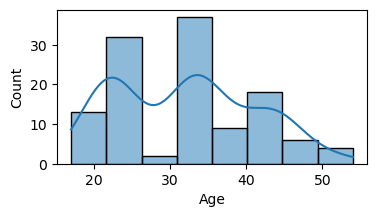

In [152]:
plt.figure(figsize=(4,2))
sns.histplot(data=df,x='Age',kde=True)

#### There are age values less than 20. Let us consider this as outliers and remove them

In [153]:
df = df[df['Age']>=20]
df.shape

(118, 6)

<AxesSubplot:xlabel='Salary', ylabel='Count'>

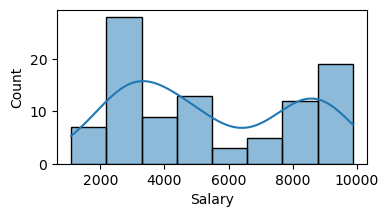

In [154]:
plt.figure(figsize=(4,2))
sns.histplot(data=df,x='Salary',kde=True)

In [157]:
#Replacing company values
df['Company'] = df['Company'].replace('Tata Consultancy Services','TCS')
df['Company'] = df['Company'].replace('Congnizant','CTS')
df['Company'] = df['Company'].replace('Infosys Pvt Lmt','Infosys')
df.Company.unique()

array(['TCS', 'Infosys', 'CTS', nan], dtype=object)

## Handling Nan Values

In [41]:
df['Age'].mean()

26.92361111111111

<AxesSubplot:xlabel='Age', ylabel='Count'>

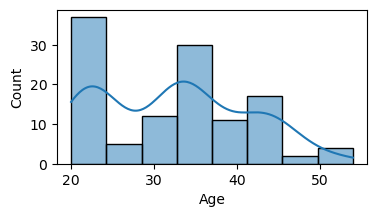

In [158]:
#Replacing Nan values with mean age
df["Age"]=df["Age"].fillna(27)
plt.figure(figsize=(4,2))
sns.histplot(data=df,x='Age',kde=True)

In [159]:
df["Salary"].mean()

5424.083333333333

<AxesSubplot:xlabel='Salary', ylabel='Count'>

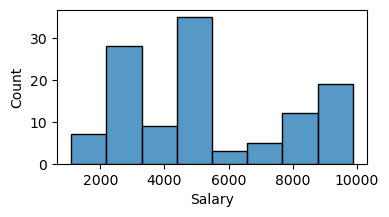

In [160]:
#Replacing Nan values with mean salary
df["Salary"]=df["Salary"].fillna(5312)
plt.figure(figsize=(4,2))
sns.histplot(data=df,x='Salary')

In [161]:
#Replacing Nan values for Places with Others
df["Place"]=df["Place"].fillna("Others")

In [163]:
#Replacing Nan values for Company with Others
df["Company"]=df["Company"].fillna("Others")

## Data Analysis

#### Filtering data with age>40 and salary<5000

In [164]:
df_filtered = df[(df['Age']>40) & (df['Salary']<5000)]
df_filtered

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


#### Plotting the chart with age and salary

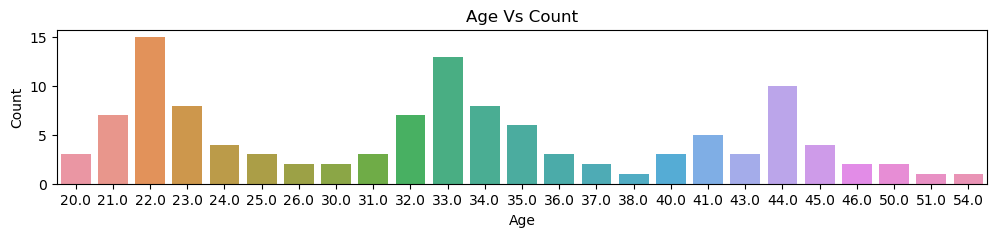

In [165]:
age_count = df['Age'].value_counts()
plt.figure(figsize=(12,2))
sns.barplot(x=age_count.index, y=age_count.values)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Vs Count")
plt.show()

<AxesSubplot:xlabel='Salary', ylabel='Count'>

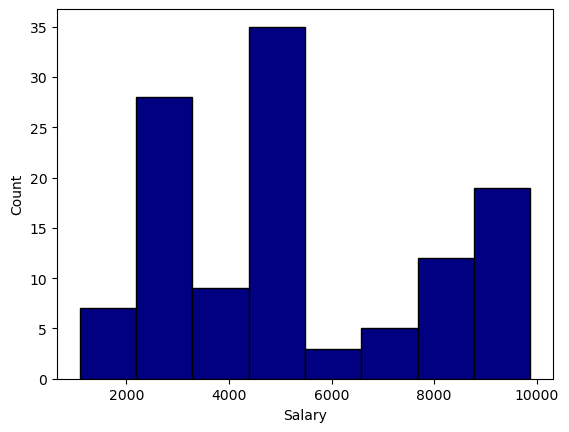

In [166]:
sns.histplot(data=df,x='Salary',color='navy',alpha=1)

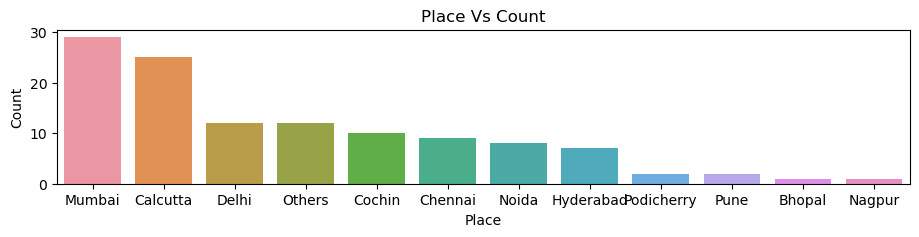

In [167]:
place_count = df['Place'].value_counts()
plt.figure(figsize=(11,2))
sns.barplot(x=place_count.index, y=place_count.values)
plt.xlabel("Place")
plt.ylabel("Count")
plt.title("Place Vs Count")
plt.show()

## Data Encoding

#### Company category encoding using Dummy Encoding

In [173]:
#creating dummy columns for company categories
dummies = pd.get_dummies(df.Company)
dummies

#merging with original df
encoded_company_merged = pd.concat([df,dummies],axis='columns')
encoded_company_merged.head()

,Company,Age,Salary,Place,Country,Gender,CTS,Infosys,Others,TCS
0,TCS,20.0,5312.0,Chennai,India,0,0,0,0,1
1,Infosys,30.0,5312.0,Mumbai,India,0,0,1,0,0
2,TCS,35.0,2300.0,Calcutta,India,0,0,0,0,1
3,Infosys,40.0,3000.0,Delhi,India,0,0,1,0,0
4,TCS,23.0,4000.0,Mumbai,India,0,0,0,0,1


In [172]:
#Dropping the original Company column and one of the dummies so as to avoid dummy trap
final_company_encoded = encoded_company_merged.drop(['Company','Others'], axis='columns')
final_company_encoded

,Age,Salary,Place,Country,Gender,CTS,Infosys,TCS
0,20.0,5312.0,Chennai,India,0,0,0,1
1,30.0,5312.0,Mumbai,India,0,0,1,0
2,35.0,2300.0,Calcutta,India,0,0,0,1
3,40.0,3000.0,Delhi,India,0,0,1,0
4,23.0,4000.0,Mumbai,India,0,0,0,1
...,...,...,...,...,...,...,...,...
142,22.0,8202.0,Mumbai,India,0,0,1,0
143,33.0,9024.0,Calcutta,India,1,0,0,1
145,44.0,4034.0,Delhi,India,1,0,1,0
146,33.0,5034.0,Mumbai,India,1,0,0,1


#### Place category encoding

In [176]:
#creating dummy columns for company categories
place_dummies = pd.get_dummies(final_company_encoded.Place)
place_dummies

#merging with company_merged df
encoded_place_merged = pd.concat([final_company_encoded,place_dummies],axis='columns')
encoded_place_merged.head()

,Age,Salary,Place,Country,Gender,CTS,Infosys,TCS,Bhopal,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Others,Podicherry,Pune
0,20.0,5312.0,Chennai,India,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,30.0,5312.0,Mumbai,India,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,35.0,2300.0,Calcutta,India,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,40.0,3000.0,Delhi,India,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,23.0,4000.0,Mumbai,India,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [178]:
#Dropping the original Place column and one of the dummies so as to avoid dummy trap
# Also dropping Country column as it has no impact
final_encoded_df = encoded_place_merged.drop(['Place','Others','Country'], axis='columns')
final_encoded_df

,Age,Salary,Gender,CTS,Infosys,TCS,Bhopal,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune
0,20.0,5312.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,30.0,5312.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,35.0,2300.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,40.0,3000.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,23.0,4000.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
143,33.0,9024.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
145,44.0,4034.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
146,33.0,5034.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


#### The final dataframe is cleaned and completely converted into numeric values and is ready for algorithms

## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
 
#Copying the columns to scale to a new df
df_to_scale = df[['Age','Salary']]
df_to_scale


In [191]:
scaler = MinMaxScaler()
#scaling the values to be between 0 & 1 using MinMax Scaling
scaled_data = scaler.fit_transform(df_to_scale)
scaled_df = pd.DataFrame(scaled_data,columns=df_to_scale.columns)
scaled_df.head()

,Age,Salary
0,0.000000,0.480596
1,0.294118,0.480596
2,0.441176,0.137817
3,0.588235,0.217480
4,0.088235,0.331285


In [195]:
#dropping the original Age & Salary columns
final_encoded=final_encoded_df.drop(['Age','Salary'],axis='columns')

#Merging the scaled columns to final encoded dataframe
final_df = pd.concat([scaled_df,final_encoded],axis='columns')
final_df.head()

,Age,Salary,Gender,CTS,Infosys,TCS,Bhopal,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune
0,0.000000,0.480596,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.294118,0.480596,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.441176,0.137817,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.588235,0.217480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.088235,0.331285,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### The final dataframe, which is cleaned,encoded and scaled is displayed above